In [1]:
import os
import random
import numpy as np

import torch
import torch.nn as nn
from torchvision import transforms

from dataset import HymenopteraDataBuilder, ImageTransformBuilder
from models import AntBeeClassifier

from tqdm import tqdm

In [2]:
DATA_DIR = './data'

LR = 0.001
NUM_EPOCHS = 10
BATCH_SIZE = 32

VGG16_SIZE = (256, 256)
VGG16_MEAN = (0.485, 0.456, 0.406)
VGG16_STD = (0.229, 0.224, 0.225)

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

cuda:0


In [3]:
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

In [ ]:
transform_builder = ImageTransformBuilder(VGG16_SIZE, VGG16_MEAN, VGG16_STD)
transform_dict = {'train': transform_builder('train'), 'val': transform_builder('val')}

dataloader_builder = HymenopteraDataBuilder(data_dir=DATA_DIR, transform_dict=transform_dict, batch_size=BATCH_SIZE)
dataloader_dict = dataloader_builder.get_dataloader()

In [ ]:
model = AntBeeClassifier().to(DEVICE)

params_to_update = []
update_param_names = ["classifier.6.weight", "classifier.6.bias"]

for name, param in model.vgg16.named_parameters():
    if name in update_param_names:
        param.required_grad = True
        params_to_update.append(param)
        print(name)
    else:
        param.required_grad = False

optimizer = torch.optim.SGD(params=params_to_update, lr=LR, momentum=0.9)
criterion = nn.BCEWithLogitsLoss()

for epoch in range(0, NUM_EPOCHS+1):
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        if epoch == 0 and phase =='train':
            continue

        running_loss = 0
        running_correct = 0

        for image_batch, label_batch in tqdm(dataloader_dict[phase]):
            image_batch = image_batch.to(DEVICE)
            label_batch = label_batch.to(DEVICE)

            optimizer.zero_grad()

            label_pred = model(image_batch)
            
            loss = criterion(label_pred.flatten(), label_batch)
            pred = (label_pred.flatten() > 0).float()

            if phase == 'train':
                loss.backward()
                optimizer.step()

            running_loss += loss.item() * image_batch.size(0)
            running_correct += torch.sum(pred == label_batch)

        running_loss /= len(dataloader_dict[phase].dataset)
        running_acc = running_correct.float() /  len(dataloader_dict[phase].dataset)

        print(f"Epoch: {epoch} | Phase: {phase} | Loss: {loss:.6f} | Acc: {running_acc:.4f}")

classifier.6.weight
classifier.6.bias


100%|██████████| 3/3 [00:00<00:00,  3.55it/s]


Epoch: 0 | Phase: val | Loss: 0.701510 | Acc: 0.5395


100%|██████████| 8/8 [00:01<00:00,  4.17it/s]


Epoch: 1 | Phase: train | Loss: 0.323275 | Acc: 0.7449


100%|██████████| 3/3 [00:00<00:00, 10.63it/s]


Epoch: 1 | Phase: val | Loss: 0.385133 | Acc: 0.9605


100%|██████████| 8/8 [00:01<00:00,  5.64it/s]


Epoch: 2 | Phase: train | Loss: 0.214506 | Acc: 0.9424


100%|██████████| 3/3 [00:00<00:00, 10.83it/s]


Epoch: 2 | Phase: val | Loss: 0.241386 | Acc: 0.9605


100%|██████████| 8/8 [00:01<00:00,  5.66it/s]


Epoch: 3 | Phase: train | Loss: 0.062457 | Acc: 0.9712


100%|██████████| 3/3 [00:00<00:00, 10.68it/s]


Epoch: 3 | Phase: val | Loss: 0.204788 | Acc: 0.9605


100%|██████████| 8/8 [00:01<00:00,  5.67it/s]


Epoch: 4 | Phase: train | Loss: 0.111335 | Acc: 0.9630


100%|██████████| 3/3 [00:00<00:00, 10.56it/s]


Epoch: 4 | Phase: val | Loss: 0.186221 | Acc: 0.9605


100%|██████████| 8/8 [00:01<00:00,  5.70it/s]


Epoch: 5 | Phase: train | Loss: 0.051359 | Acc: 0.9712


100%|██████████| 3/3 [00:00<00:00, 10.98it/s]


Epoch: 5 | Phase: val | Loss: 0.170237 | Acc: 0.9605


100%|██████████| 8/8 [00:01<00:00,  5.73it/s]


Epoch: 6 | Phase: train | Loss: 0.102669 | Acc: 0.9547


100%|██████████| 3/3 [00:00<00:00, 10.75it/s]


Epoch: 6 | Phase: val | Loss: 0.165372 | Acc: 0.9605


100%|██████████| 8/8 [00:01<00:00,  5.64it/s]


Epoch: 7 | Phase: train | Loss: 0.035425 | Acc: 0.9794


100%|██████████| 3/3 [00:00<00:00, 10.77it/s]


Epoch: 7 | Phase: val | Loss: 0.165541 | Acc: 0.9605


100%|██████████| 8/8 [00:01<00:00,  5.76it/s]


Epoch: 8 | Phase: train | Loss: 0.088527 | Acc: 0.9753


100%|██████████| 3/3 [00:00<00:00, 10.51it/s]


Epoch: 8 | Phase: val | Loss: 0.150199 | Acc: 0.9605


100%|██████████| 8/8 [00:01<00:00,  5.67it/s]


Epoch: 9 | Phase: train | Loss: 0.098593 | Acc: 0.9753


100%|██████████| 3/3 [00:00<00:00, 10.50it/s]


Epoch: 9 | Phase: val | Loss: 0.144417 | Acc: 0.9605


100%|██████████| 8/8 [00:01<00:00,  5.73it/s]


Epoch: 10 | Phase: train | Loss: 0.031342 | Acc: 0.9877


100%|██████████| 3/3 [00:00<00:00, 10.86it/s]

Epoch: 10 | Phase: val | Loss: 0.136908 | Acc: 0.9605


tensor([[-12.4068]], device='cuda:0', grad_fn=<AddmmBackward0>) tensor([[6.2416]], device='cuda:0', grad_fn=<AddmmBackward0>)


Text(0.5, 1.0, 'bee')

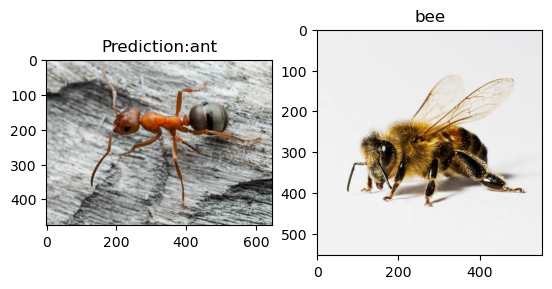

In [16]:
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

ant_template_path = './data/hymenoptera_data/sample/ant.jpeg' # desired output: 0
bee_template_path = './data/hymenoptera_data/sample/bee.jpeg' # desired output: 1

ant_image_template = Image.open(ant_template_path)
bee_image_template = Image.open(bee_template_path)

img0 = transform_dict['val'](ant_image_template)
img0 = img0.unsqueeze_(0).to(DEVICE)

img1 = transform_dict['val'](bee_image_template)
img1 = img1.unsqueeze_(0).to(DEVICE)

pred0 = model(img0)
pred1 = model(img1)

print(pred0, pred1)

plt.subplot(1,2,1)
plt.imshow(ant_image_template)
plt.title("Prediction:" + 'ant' if pred0.item() < 0 else 'bee')

plt.subplot(1,2,2)
plt.imshow(bee_image_template)
plt.title("Prediction:" + 'ant' if pred1.item() < 0 else 'bee')